# Modeling - Vanilla Algorithms Feature Selection
Author: P.C.O. Maseland <br>
Date: 03 December 2021 <br>

In [1]:
# !!! RUN !!!
#Import packages/libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Load Correct datafile

**prepared accelerometer, gyroscope and magnetometer csv**

In [2]:
# !!! RUN !!!
#local jupyter notebook path
path ="Totalset+slopes+mean+sd.csv"
df = pd.read_csv(path)

In [3]:
df.head(100)

,magnitude_chest_acc,magnitude_forearm_acc,magnitude_head_acc,magnitude_shin_acc,magnitude_thigh_acc,magnitude_upperarm_acc,magnitude_waist_acc,magnitude_chest_gyr,magnitude_forearm_gyr,magnitude_head_gyr,...,magnitude_head_mag_mean,magnitude_head_mag_sd,magnitude_shin_mag_mean,magnitude_shin_mag_sd,magnitude_thigh_mag_mean,magnitude_thigh_mag_sd,magnitude_upperarm_mag_mean,magnitude_upperarm_mag_sd,magnitude_waist_mag_mean,magnitude_waist_mag_sd
0,9.771236,9.787128,9.684595,10.100332,9.532843,10.154984,9.825808,0.038048,0.005705,0.069351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.803299,9.830025,9.652884,10.090979,9.538804,10.144928,9.820284,0.036161,0.009607,0.063729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.828618,9.848948,9.723963,10.092054,9.538612,10.162209,9.807764,0.037268,0.008487,0.067978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.672613,9.831390,9.775289,10.098940,9.530453,10.222147,9.857982,0.051724,0.008386,0.075489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.800911,9.879557,9.749285,10.089414,9.536494,10.269088,9.843884,0.050047,0.014337,0.092244,...,50.880480,0.000000e+00,39.744127,0.0,43.489173,0.000000,49.108764,0.0,49.129630,0.068392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.813382,9.843272,9.728845,10.123720,9.531407,10.199592,9.815353,0.074777,0.050545,0.062284,...,50.814043,1.935957e-01,39.966902,0.0,43.415478,0.134441,49.179638,0.0,49.233537,0.398488
96,9.758835,9.837921,9.746465,10.113368,9.523090,10.203853,9.887570,0.073352,0.051339,0.061273,...,50.896380,1.215304e-01,39.966902,0.0,43.355354,0.164656,49.179638,0.0,49.300787,0.332561
97,9.761502,9.849287,9.751139,10.105277,9.542320,10.198063,9.895177,0.069118,0.048489,0.064585,...,50.950730,1.795787e-07,39.966902,0.0,43.295230,0.164656,49.179638,0.0,49.298018,0.334056
98,9.816022,9.838173,9.704408,10.108862,9.533452,10.224991,9.815756,0.056011,0.047734,0.058587,...,50.950730,1.795787e-07,39.966902,0.0,43.235106,0.134441,49.179638,0.0,49.148624,0.000000


In [3]:
# !!! RUN !!!
#reorder such that labels are at the back
df = df[[c for c in df if c not in ['Subject ID','Activity']] 
       + ['Subject ID','Activity']]

In [5]:
df.columns

Index(['magnitude_chest_acc', 'magnitude_forearm_acc', 'magnitude_head_acc',
       'magnitude_shin_acc', 'magnitude_thigh_acc', 'magnitude_upperarm_acc',
       'magnitude_waist_acc', 'magnitude_chest_gyr', 'magnitude_forearm_gyr',
       'magnitude_head_gyr', 'magnitude_shin_gyr', 'magnitude_thigh_gyr',
       'magnitude_upperarm_gyr', 'magnitude_waist_gyr', 'magnitude_chest_mag',
       'magnitude_forearm_mag', 'magnitude_head_mag', 'magnitude_shin_mag',
       'magnitude_thigh_mag', 'magnitude_upperarm_mag', 'magnitude_waist_mag',
       'magnitude_chest_acc_slope', 'magnitude_forearm_acc_slope',
       'magnitude_head_acc_slope', 'magnitude_shin_acc_slope',
       'magnitude_thigh_acc_slope', 'magnitude_upperarm_acc_slope',
       'magnitude_waist_acc_slope', 'magnitude_chest_gyr_slope',
       'magnitude_forearm_gyr_slope', 'magnitude_head_gyr_slope',
       'magnitude_shin_gyr_slope', 'magnitude_thigh_gyr_slope',
       'magnitude_upperarm_gyr_slope', 'magnitude_waist_gyr_slope'

**Activity coding & Distribution**
- 'climbingdown' {0} 
- 'climbingup' {1} 
- 'jumping' {2} 
- 'lying' {3} 
- 'running' {4} 
- 'sitting' {5}
- 'standing' {6} 
- 'walking' {7}]

In [38]:
#Class distribution
pd.crosstab(index = df["Activity"],columns="count")

col_0,count
Activity,
0,602580
1,689232
2,103584
3,920304
4,989028
5,918312
6,909348
7,927276


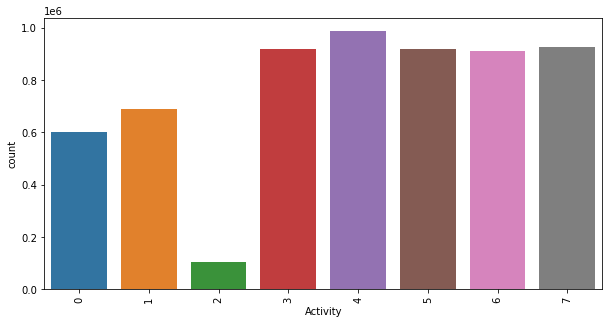

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Activity", data=df)
plt.xticks(x = df['Activity'],  rotation='vertical')
plt.show()

### Remove/Convert statistical NaN values
Since we calculated our rolled statistics over a nr of timesteps. The first nr of timesteps have a NaN, these are therefore useless. On the whole set we removed thereby 24336 rows, which is just a small fraction of 0.4% of the whole.

In [4]:
df.shape

(6084000, 86)

In [4]:
# !!! RUN !!!
df = df. dropna()

In [6]:
df.shape

(6059664, 86)

In [9]:
#removed rows. %loss
((6084000 - 6059664) /6084000)*100

0.4

### Full set copy

In [5]:
# !!! RUN !!!
#create copy full set
fullset = df
print(fullset.shape)

#drop subject ID
fullset_without_subject = fullset.drop(columns=['Subject ID'])

#shuffle fullset
fullset_without_subject = fullset_without_subject.sample(frac=1)

(6059664, 86)


### Reduce size of set for computation


In [6]:
# !!! RUN !!!
#take 10% of the data just for computational advantages, just experimenting
size_subset = 0.1
fullset_without_subject = fullset.drop(columns=['Subject ID'])

#shuffle fullset
fullset_without_subject = fullset_without_subject.sample(frac=1)
subset_without_subject = fullset_without_subject[0:round(len(df)*size_subset)]

print(subset_without_subject.shape)
print(type(subset_without_subject))

(605966, 85)
<class 'pandas.core.frame.DataFrame'>


In [7]:
#shuffle subset
subset_without_subject = subset_without_subject.sample(frac=1)

## Feature selection
To prevent CPU power of overloading, lets start with less feature at the time using RF. And increase this considerably.

Use feature selection as a technique to find the best features to use.
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

Fisher's Score, or Information Gain or Correlation Coefficient


In [11]:
X = fullset_without_subject.iloc[:,:-1]
print(X.shape)
print(type(X))

(6059664, 84)
<class 'pandas.core.frame.DataFrame'>


In [12]:
y = fullset_without_subject['Activity']
print(y.shape)

(6059664,)


In [8]:
X2 = subset_without_subject.iloc[:,:-1]
print(X2.shape)
print(type(X2))

y2 = subset_without_subject['Activity']
print(y2.shape)

(605966, 84)
<class 'pandas.core.frame.DataFrame'>
(605966,)


In [17]:
n_samples, n_features = np.shape(X)
print(n_samples, n_features)

n_labels = np.shape(y)
print(n_labels)

6059664 84
(6059664,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

### Correlation Coefficient

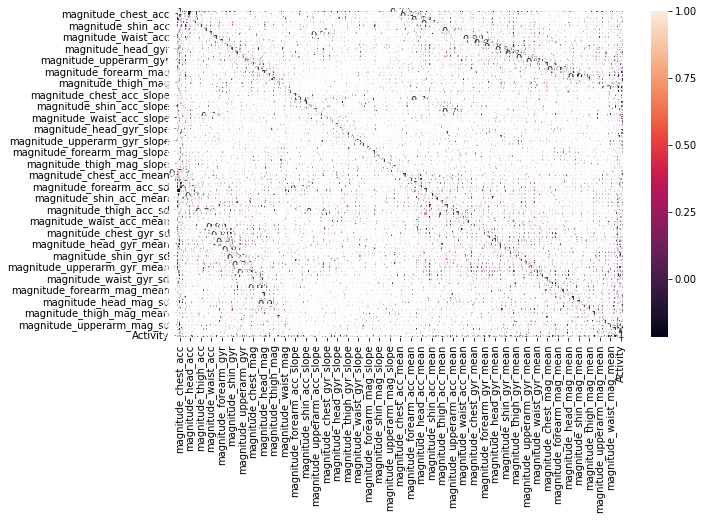

In [28]:
#correlation coefficient (Pearson Correlation)
cor = subset_without_subject.corr()

#plotting Heatmap
plt.figure(figsize = (10 , 6))
sns.heatmap(cor, annot = True)

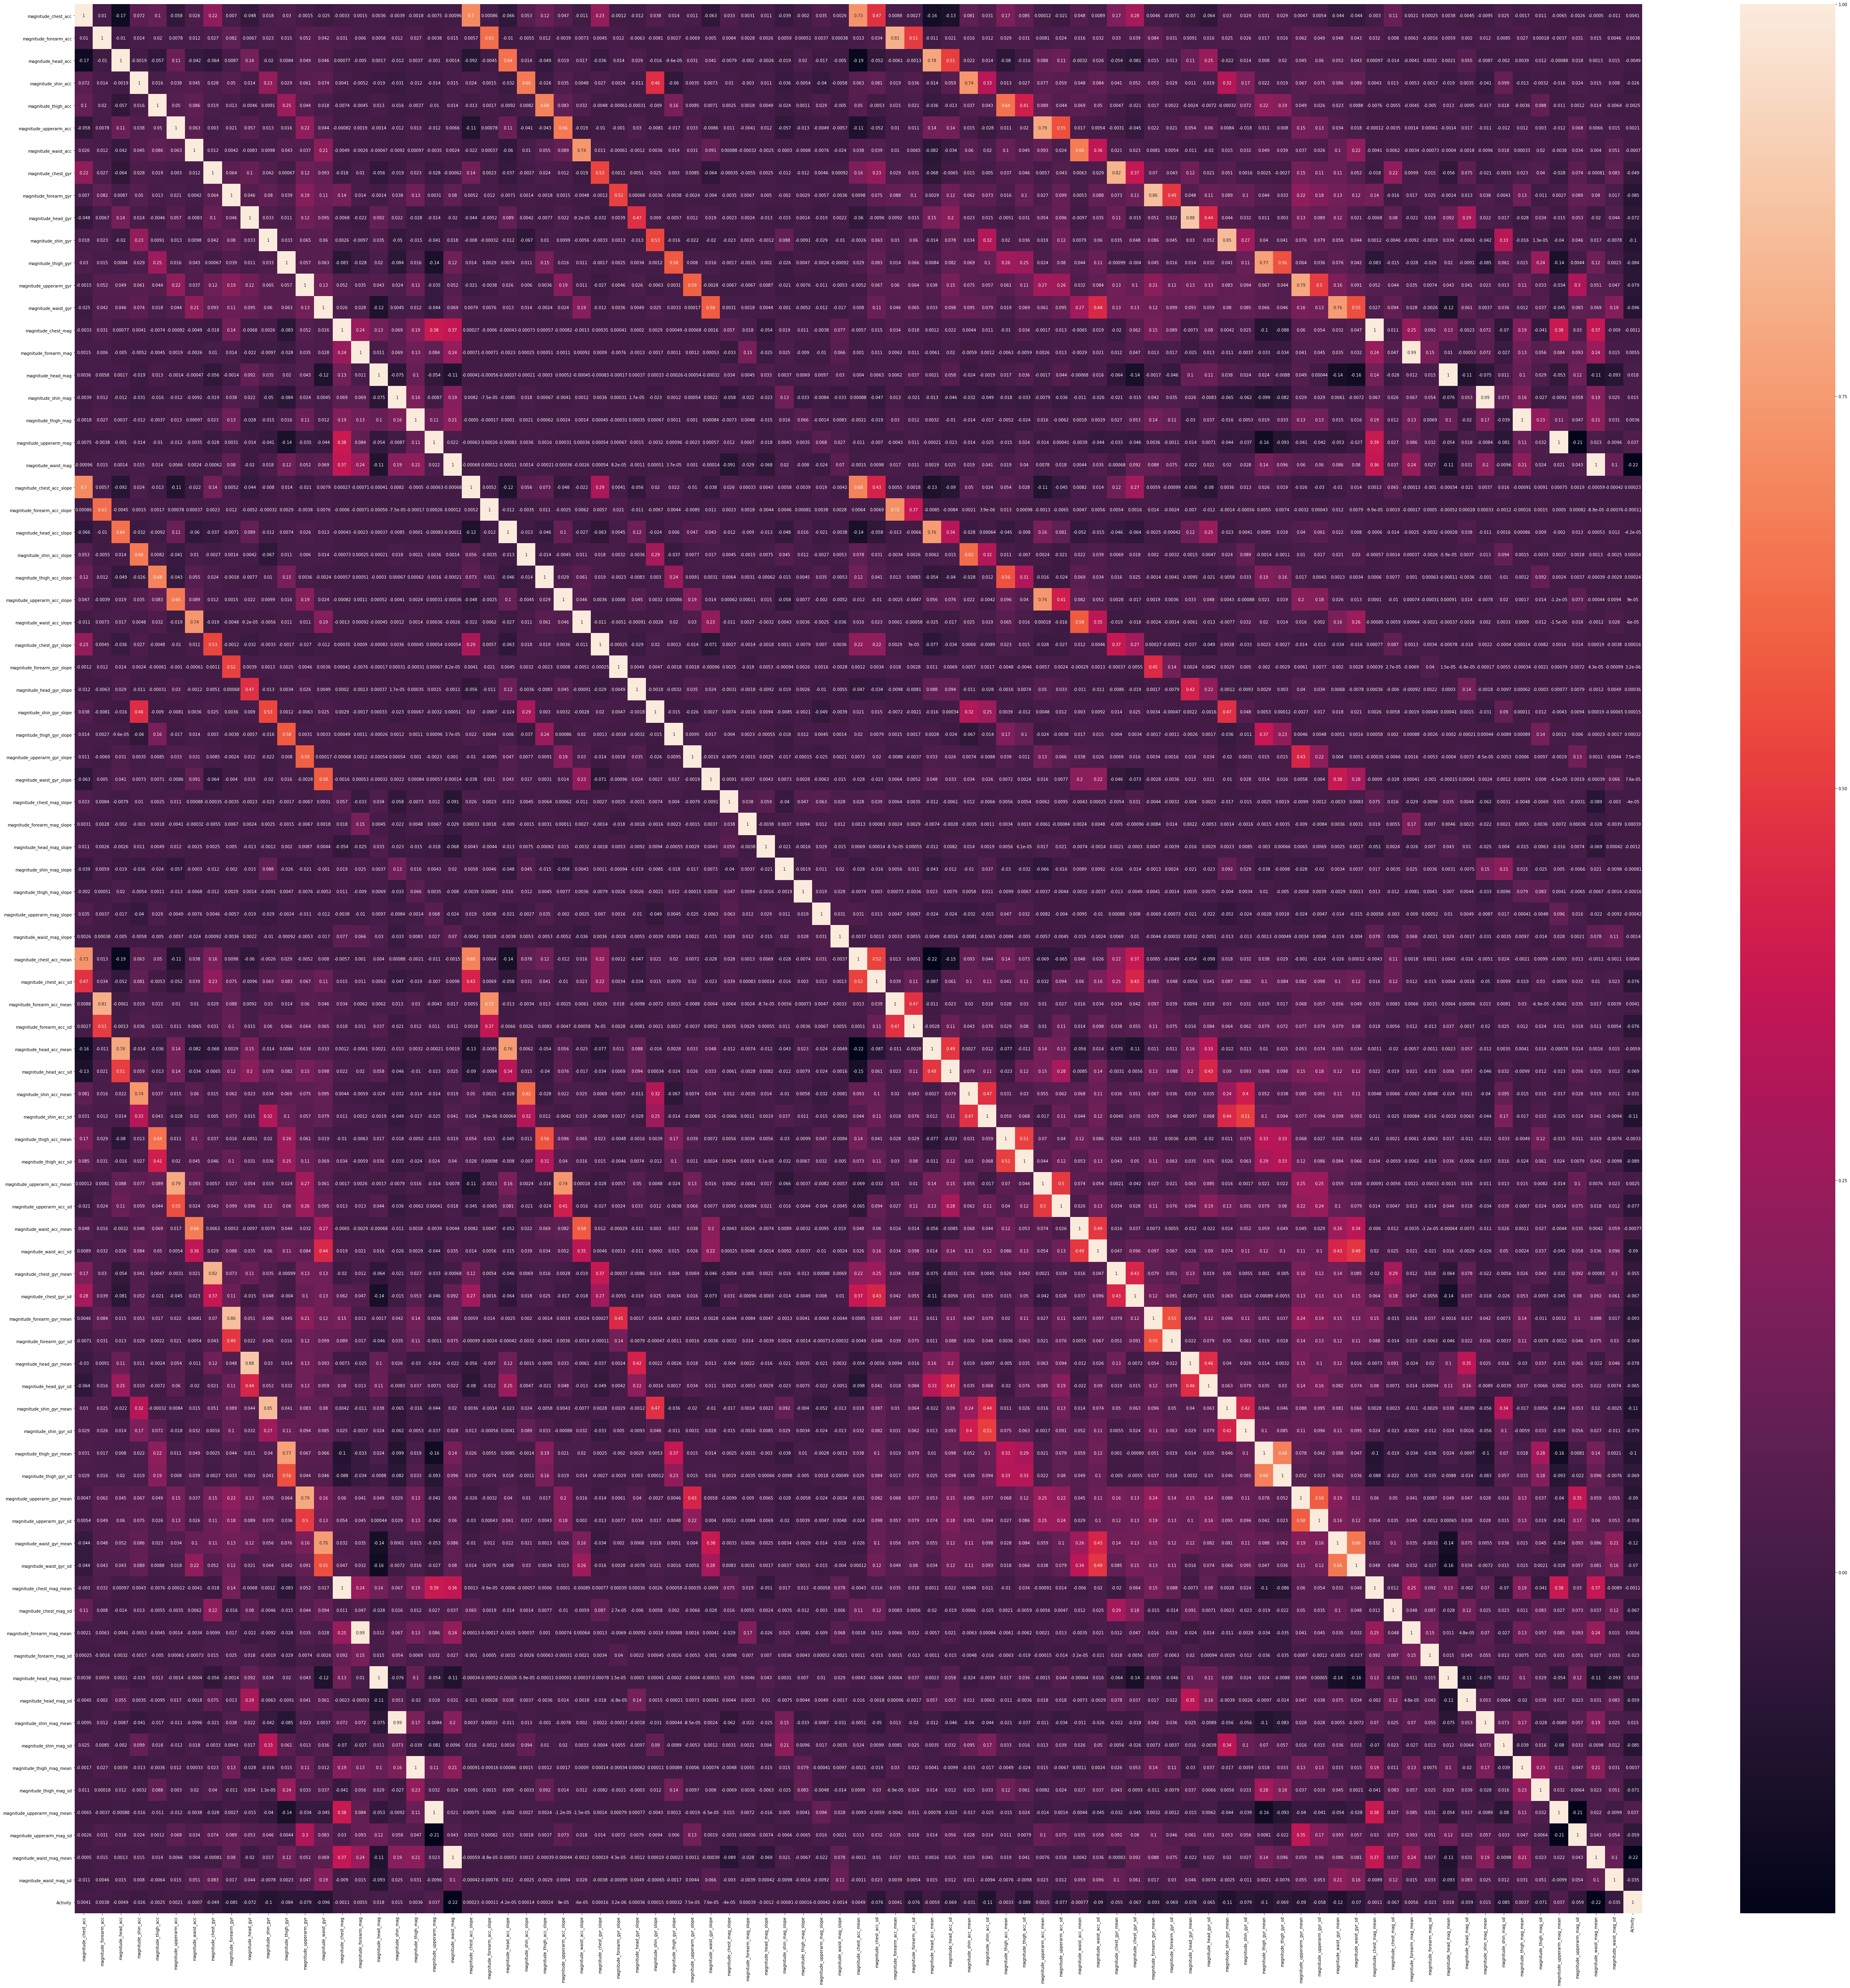

In [30]:
#plotting Heatmap try 2
plt.figure(figsize = (86 , 86))
sns.heatmap(cor, annot = True)

In [146]:
#correlation with Activity
corAct = cor['Activity'].sort_values(ascending=False)
corAct
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(corAct)

Activity                        1.000000
magnitude_upperarm_mag_mean     0.036939
magnitude_upperarm_mag          0.036935
magnitude_head_mag              0.018287
magnitude_head_mag_mean         0.018259
magnitude_shin_mag              0.014580
magnitude_shin_mag_mean         0.014555
magnitude_forearm_mag_mean      0.005606
magnitude_forearm_mag           0.005530
magnitude_chest_acc_mean        0.004892
magnitude_chest_acc             0.004095
magnitude_forearm_acc_mean      0.004094
magnitude_forearm_acc           0.003781
magnitude_thigh_mag_mean        0.003651
magnitude_thigh_mag             0.003650
magnitude_upperarm_acc_mean     0.002475
magnitude_upperarm_acc          0.002060
magnitude_forearm_mag_slope     0.000394
magnitude_head_gyr_slope        0.000361
magnitude_thigh_gyr_slope       0.000321
magnitude_thigh_acc_slope       0.000240
magnitude_chest_acc_slope       0.000233
magnitude_chest_gyr_slope       0.000156
magnitude_shin_gyr_slope        0.000147
magnitude_shin_a

In [110]:
cornew = cor.abs()

In [137]:
#Only retrieve values that are above 0.6 threshold
s = cornew.unstack()
so = s.sort_values(kind="quicksort")

result = so.where(so >= 0.5)
result = result.where(so != 1.0)
result = result.dropna()

In [138]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(result)

magnitude_upperarm_gyr        magnitude_upperarm_gyr_sd       0.501370
magnitude_upperarm_gyr_sd     magnitude_upperarm_gyr          0.501370
magnitude_forearm_acc         magnitude_forearm_acc_sd        0.505106
magnitude_forearm_acc_sd      magnitude_forearm_acc           0.505106
magnitude_shin_acc_sd         magnitude_shin_gyr_sd           0.505670
magnitude_shin_gyr_sd         magnitude_shin_acc_sd           0.505670
magnitude_head_acc            magnitude_head_acc_sd           0.508507
magnitude_head_acc_sd         magnitude_head_acc              0.508507
magnitude_thigh_acc_mean      magnitude_thigh_acc_sd          0.510431
magnitude_thigh_acc_sd        magnitude_thigh_acc_mean        0.510431
magnitude_forearm_gyr         magnitude_forearm_gyr_slope     0.519135
magnitude_forearm_gyr_slope   magnitude_forearm_gyr           0.519135
magnitude_chest_acc_sd        magnitude_chest_acc_mean        0.519763
magnitude_chest_acc_mean      magnitude_chest_acc_sd          0.519763
magnit

**Pairwise Correlation filtering** <br>
It is visible that magnitude columns correlate strongly with the mean, sd or slope column. The mean and sd have two cases. Mean and Slope also correlate strongly. In a single case (magnitude_shin_acc_sd vs magnitude_shin_gyr_sd) the gyr and acc are correlated.

From this to make it computational faster, we should drop the single 'magnitude_bodyposition_sensor' features (what makes a lot of sence, since these don't tell as much as the statistical values).

Furthermore, the mean statistical turns out to give the most correlation on activity, whiles there are not really strong correlations with Activity. No higher than 0.1 which is not a good perspective. This of course derives since we look at continuous values. 

### Make new subset
With only time-base statistical values

In [9]:
# !!! RUN !!!
statistical_cols = [col for col in fullset_without_subject.columns if ('slope' in col 
                                                                      or 'mean' in col 
                                                                      or 'sd' in col
                                                                      or 'Activity' in col)]
statistical_cols

new_subset = fullset_without_subject[statistical_cols]
new_subset.shape

(6059664, 64)

In [10]:
#subset alternative (smaller set)
statistical_cols = [col for col in subset_without_subject.columns if ('slope' in col 
                                                                      or 'mean' in col 
                                                                      or 'sd' in col
                                                                      or 'Activity' in col)]
statistical_cols

new_subset2 = subset_without_subject[statistical_cols]
new_subset2.shape

(605966, 64)

In [11]:
X2 = new_subset2.iloc[:,:-1]
print(X2.shape)
print(type(X2))

y2 = new_subset2['Activity']
print(y2.shape)

(605966, 63)
<class 'pandas.core.frame.DataFrame'>
(605966,)


### Information Gain - Feature Importance

In [12]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X2, y2)
feat_importances = pd.Series(importances, new_subset2.columns[0:len(new_subset2.columns)-1]) 

In [13]:
def cm_to_inch(value):
    return value/2.54

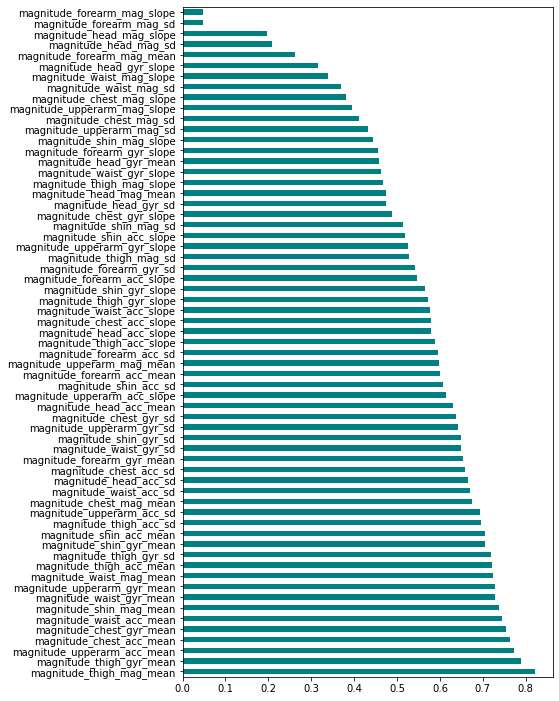

In [32]:
plt.figure(figsize=(cm_to_inch(20),cm_to_inch(25)))
feat_importances.nlargest(63).plot(kind='barh', color = 'teal')
plt.tight_layout()
plt.savefig('featureimportance.png')
plt.show()

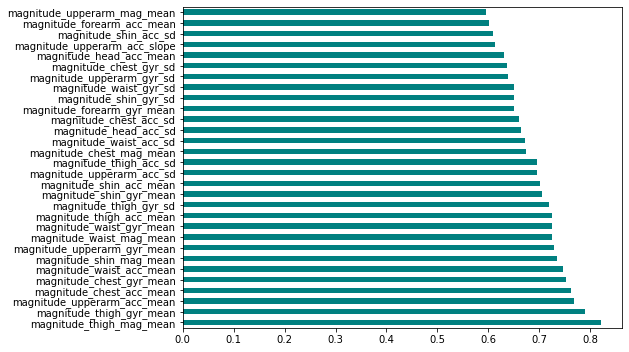

In [15]:
plt.figure(figsize=(cm_to_inch(20),cm_to_inch(15)))
feat_importances.nlargest(30).plot(kind='barh', color = 'teal')
plt.savefig('top30_featureimportance.png', bbox_inches='tight')
plt.show()